In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import *
π = pi
from tqdm.notebook import *
#%config InlineBackend.figure_formats = ['svg']

## $y$-diagonalized Hofstadter hamiltonian :
Fixed $N_x$, $n_\phi$ and $k_y$

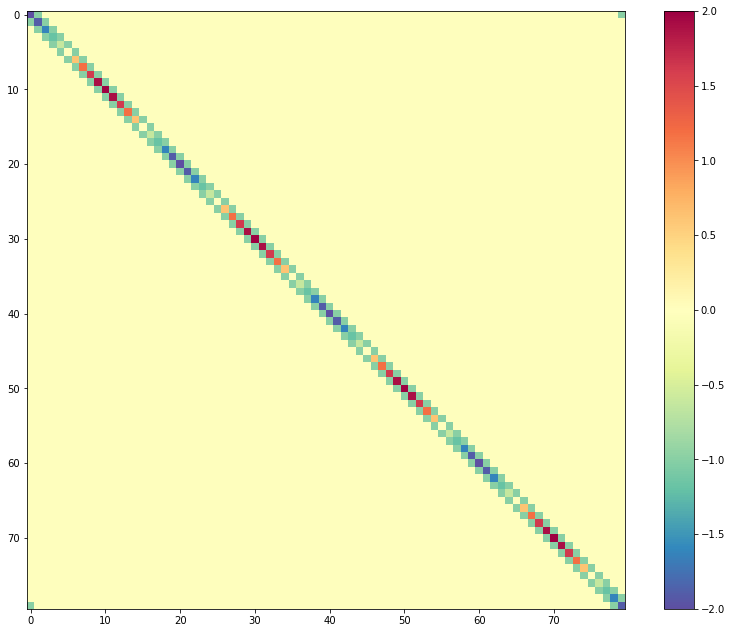

In [3]:
def build_hamiltonian_x (Nx, nϕ_n, ky_Ny, PBC=True, t=1):

    nϕ = nϕ_n / Nx

    H = np.zeros((Nx,Nx))
    for x in range(Nx-1):
        H[x, x+1] = H[x+1, x] = -t
    for x in range(Nx):
        H[x, x] = -2*t * cos(2*π*nϕ*x + 2*π*ky_Ny)

    if PBC:
       H[Nx-1, 0] = H[0, Nx-1] = -t
    
    return H

H = build_hamiltonian_x(80, 4, ky_Ny=0)
plt.figure(figsize=(14,11))
plt.imshow(H, cmap='Spectral_r', vmin=-2, vmax=2)
plt.colorbar();

## Spectrum at fixed $n_\phi$ and $k_y$ :

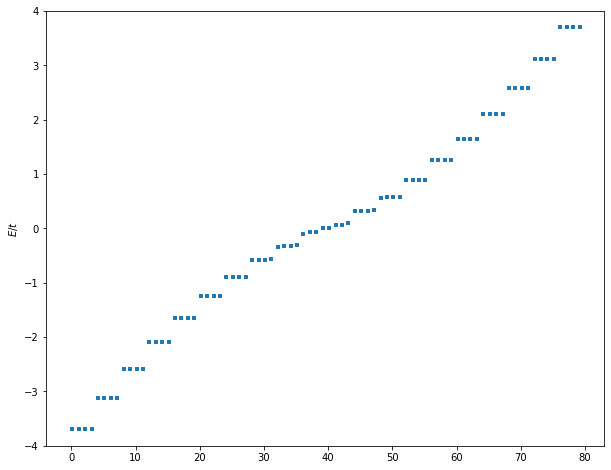

In [104]:
Nx = 80
n = 4
H = build_hamiltonian_x(Nx, n, ky_Ny=1/4)
eigvals, eigvecs = np.linalg.eigh(H)
p = np.argsort(eigvals)
eigvals = eigvals[p]
eigvecs = eigvecs[p]

plt.figure(figsize=(10,8))
plt.scatter(np.arange(Nx), eigvals, marker=',', s=9)
plt.ylim(-4,4)
plt.ylabel(r"$E/t$");

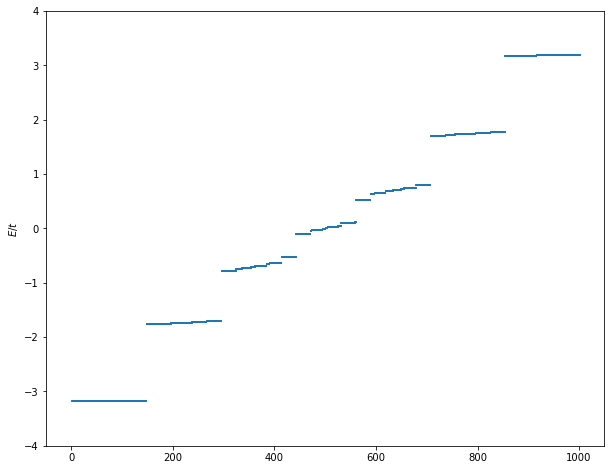

In [108]:
Nx = 1000
n = 147
H = build_hamiltonian_x(Nx, n, ky_Ny=0)
eigvals, eigvecs = np.linalg.eigh(H)
p = np.argsort(eigvals)
eigvals = eigvals[p]
eigvecs = eigvecs[p]

plt.figure(figsize=(10,8))
plt.scatter(np.arange(Nx), eigvals, marker=',', s=1)
plt.ylim(-4,4)
plt.ylabel(r"$E/t$");

## The Hofstadter butterfly

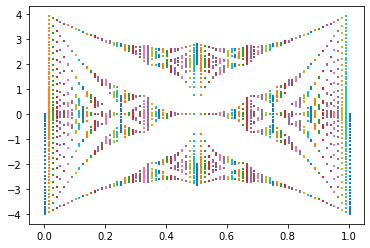

In [28]:
Nx = 80
for n in range(Nx+1):
    H = build_hamiltonian_x(Nx, n, ky_Ny=0)
    eigvals, _ = np.linalg.eigh(H)
    plt.scatter(np.ones(Nx)*(n/Nx), eigvals, marker=',', s=1)

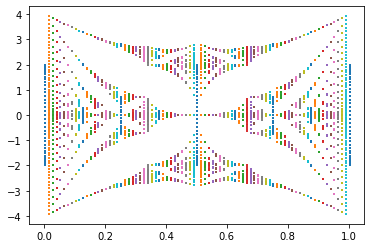

In [9]:
Nx = 80
for n in range(Nx+1):
    H = build_hamiltonian_x(Nx, n, ky_Ny=1/4)
    eigvals, _ = np.linalg.eigh(H)
    plt.scatter(np.ones(Nx)*(n/Nx), eigvals, marker=',', s=1)

  0%|          | 0/12 [00:00<?, ?it/s]

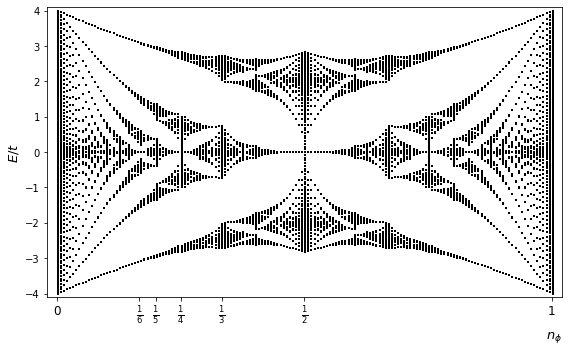

In [27]:
plt.figure(figsize=(8,5))
Nx = 160
every_nphi = []
every_eigvals = []
for ky_Ny in tqdm([k/12. for k in range(0,12)]):
    for n in range(Nx+1):
        H = build_hamiltonian_x(Nx, n, ky_Ny)
        eigvals, _ = np.linalg.eigh(H)
        every_nphi += [n/Nx]*Nx
        every_eigvals += list(eigvals)

plt.scatter(every_nphi, every_eigvals, marker=',', s=1, color='black', rasterized=True)
plt.xticks([0,1/6,1/5,1/4,1/3,1/2,1], ["0", r"$\frac{1}{6}$", r"$\frac{1}{5}$", r"$\frac{1}{4}$", r"$\frac{1}{3}$", r"$\frac{1}{2}$", "1"], fontsize=12)
plt.ylim(-4.1,4.1)
plt.xlim(-0.02,1.02)
plt.xlabel(r"$n_\phi$", fontsize=13, horizontalalignment='right', x=1)
plt.ylabel(r"$E/t$", fontsize=13)
plt.tight_layout()
plt.savefig("hofstadter_butterfly.pdf", bbox_inches='tight')

## Landau levels at low field

  0%|          | 0/130 [00:00<?, ?it/s]

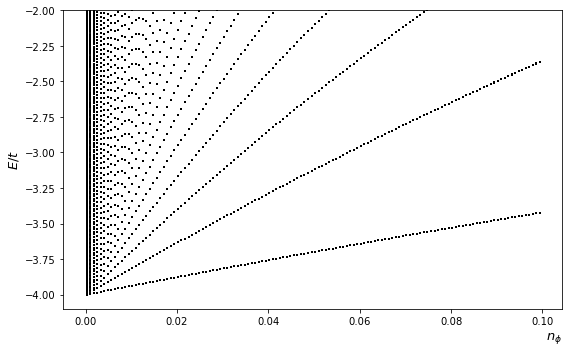

In [96]:
plt.figure(figsize=(8,5))
Nx = 1300
every_nphi = []
every_eigvals = []
for ky_Ny in [0]:
    for n in tqdm(range(Nx//10)):
        H = build_hamiltonian_x(Nx, n, ky_Ny)
        eigvals, _ = np.linalg.eigh(H)
        every_nphi += [n/Nx]*Nx
        every_eigvals += list(eigvals)

plt.scatter(every_nphi, every_eigvals, marker=',', s=1, color='black', rasterized=True)
plt.ylim(-4.1,-2)
plt.xlabel(r"$n_\phi$", fontsize=13, horizontalalignment='right', x=1)
plt.ylabel(r"$E/t$", fontsize=13)
plt.tight_layout()
plt.savefig("hofstadter_butterfly_zoom_landau.pdf", bbox_inches='tight')

## Energy spectrum as a function of $k_y$ when $n_\phi = \frac{1}{3}$

###  – **Periodic boundary conditions :**

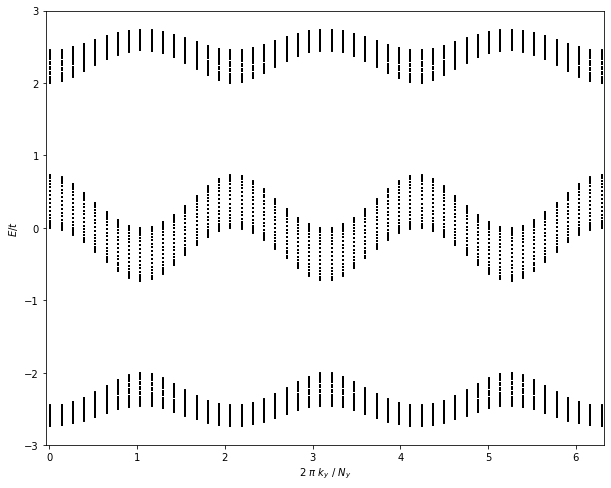

In [4]:
Nx = 120
plt.figure(figsize=(10,8))

for ky_Ny in np.linspace(0, 1):
    H = build_hamiltonian_x(Nx, 1/3*Nx, ky_Ny)
    eigvals, eigvecs = np.linalg.eigh(H)
    plt.scatter([2*np.pi*ky_Ny]*Nx, eigvals, color='black', marker=',', s=1, rasterized=True)

plt.ylim(-3,3)
plt.xlim(-0.04,6.32)
plt.ylabel(r"$E/t$");
plt.xlabel(r"2 $\pi$ $k_y$ / $N_y$");

plt.savefig("pbc_p1q3.pdf", bbox_inches='tight')

### – Open boundary conditions :

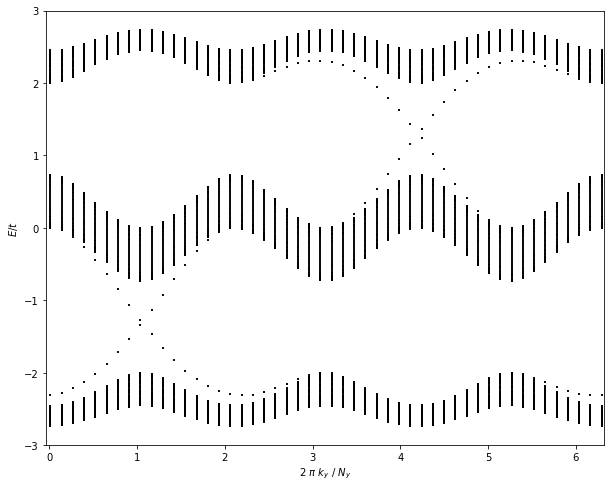

In [5]:
Nx = 120
plt.figure(figsize=(10,8))

for ky_Ny in np.linspace(0, 1):
    H = build_hamiltonian_x(Nx, 1/3*Nx, ky_Ny, PBC=False)
    eigvals, eigvecs = np.linalg.eigh(H)
    plt.scatter([2*np.pi*ky_Ny]*Nx, eigvals, color='black', marker=',', s=1, rasterized=True)

plt.ylim(-3,3)
plt.xlim(-0.04,6.32)
plt.ylabel(r"$E/t$");
plt.xlabel(r"2 $\pi$ $k_y$ / $N_y$");

plt.savefig("obc_p1q3.pdf", bbox_inches='tight')

## Energy spectrum as a function of $k_y$ when $n_\phi = \frac{1}{2}$

###  – **Periodic boundary conditions :**

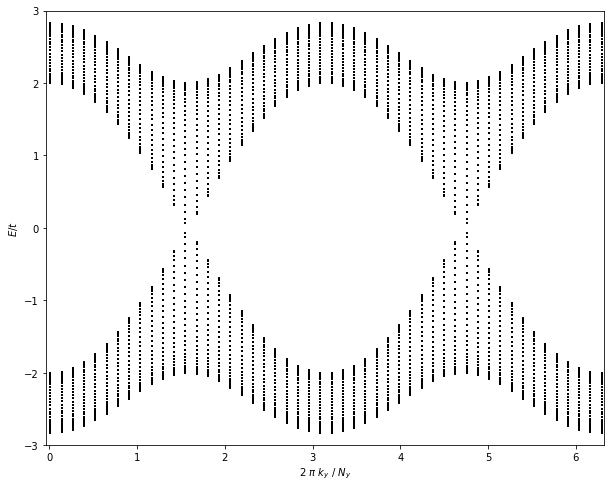

In [6]:
Nx = 120
plt.figure(figsize=(10,8))

for ky_Ny in np.linspace(0, 1):
    H = build_hamiltonian_x(Nx, 1/2*Nx, ky_Ny)
    eigvals, eigvecs = np.linalg.eigh(H)
    plt.scatter([2*np.pi*ky_Ny]*Nx, eigvals, color='black', marker=',', s=1, rasterized=True)

plt.ylim(-3,3)
plt.xlim(-0.04,6.32)
plt.ylabel(r"$E/t$");
plt.xlabel(r"2 $\pi$ $k_y$ / $N_y$");

plt.savefig("pbc_p1q2.pdf", bbox_inches='tight')

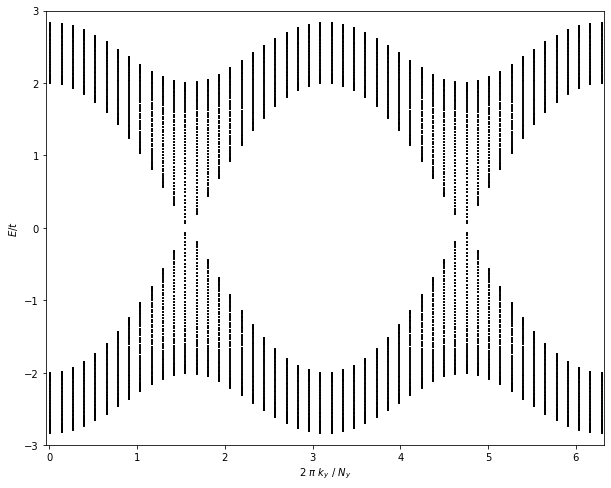

In [7]:
Nx = 120
plt.figure(figsize=(10,8))

for ky_Ny in np.linspace(0, 1):
    H = build_hamiltonian_x(Nx, 1/2*Nx, ky_Ny, PBC=False)
    eigvals, eigvecs = np.linalg.eigh(H)
    plt.scatter([2*np.pi*ky_Ny]*Nx, eigvals, color='black', marker=',', s=1, rasterized=True)

plt.ylim(-3,3)
plt.xlim(-0.04,6.32)
plt.ylabel(r"$E/t$");
plt.xlabel(r"2 $\pi$ $k_y$ / $N_y$");

plt.savefig("obc_p1q2.pdf", bbox_inches='tight')

## Exploiting the "magnetic translation" invariance